# Wikipedia API Example

For questions, contact Dr. Hickman (jh2343@georgetown.edu)

For more see: https://wikipedia.readthedocs.io/en/latest/code.html

**Installation**

From the command line

```
conda deactivate
conda active ANLY501
conda install -c conda-forge wikipedia
python -m pip install wikipedia_sections
```
To generate the wordcloud you need 
```
conda install -c conda-forge wordcloud
```
To use a conda enviroment inside VSC run, if you haven't already 
```
conda install ipykernel --update-deps --force-reinstall
```

**Import**

In [52]:
import wikipedia

### Search

**command**: wikipedia.search(query, results=10, suggestion=False)
* Does a Wikipedia search for query.
* results - the maxmimum number of results returned
* suggestion - if True, return results and suggestion (if any) in a tuple
  
**returns**: list of titles of wikipedia page titles relevant to search





In [53]:
wikipedia.search("soccor", results=10, suggestion=False)

['Association football',
 'Maria Soccor',
 'Darrin Henson',
 'Brisbane City FC',
 'Palm Beach SC',
 'Taringa Rovers SFC',
 'Mt Gravatt Hawks FC',
 'Soccor Velho',
 "United States women's national soccer team",
 'Robert Clivillés']

### Summary 

**command**: wikipedia.summary(query, sentences=0, chars=0, auto_suggest=True, redirect=True)
* *arguments*:
* sentences - if set, return the first sentences sentences (can be no greater than 10).
* chars - if set, return only the first chars characters (actual text returned may be slightly longer).
* auto_suggest - let Wikipedia find a valid page title for the query
* redirect - allow redirection without raising RedirectError

**Returns**: Plain text summary of the page.



In [54]:
wikipedia.summary("Palm Beach SC")
# this gets information from the page https://en.wikipedia.org/wiki/Palm_Beach_SC

'Palm Beach Soccer Club is an Australian amateur soccer club based in Gold Coast, Queensland. The club was formed in 1966.\n\n'

### Page

**command**: wikipedia.page(title=None, pageid=None, auto_suggest=True, redirect=True, preload=False)
* *Arguments*:
* title - the title of the page to load
* pageid - the numeric pageid of the page to load
* auto_suggest - let Wikipedia find a valid page title for the query
* redirect - allow redirection without raising RedirectError
* preload - load content, summary, images, references, and links during initialization

**Returns**: a WikipediaPage object for the page with title or the pageid (mutually exclusive).

See the link above for more info on objects of the class "wikipedia.WikipediaPage"

In [55]:
page=wikipedia.page(title='Palm Beach SC')
# this gets information from the page https://en.wikipedia.org/wiki/Palm_Beach_SC

### Geosearch

Do a wikipedia geo search for latitude and longitude using HTTP API described in http://www.mediawiki.org/wiki/Extension:GeoData

* Arguments:
* latitude (float or decimal.Decimal)
* longitude (float or decimal.Decimal)
* Keyword arguments:
* title - The title of an article to search for
* results - the maximum number of results returned
* radius - Search radius in meters. The value must be between 10 and 10000


In [56]:
#DC = (Latitude, longitude) = (38.89511, -77.03637)
wikipedia.geosearch(38.89511, -77.03637)

['Zero Milestone',
 'National Christmas Tree (United States)',
 'White House vegetable garden',
 "President's Park",
 'White House tennis court',
 'The Ellipse',
 'South Lawn',
 '1974 White House helicopter incident',
 'General William Tecumseh Sherman Monument',
 'Office of Trade and Manufacturing Policy']

### Explore the WikipediaPage object

In [57]:
#Plain text content of the page, excluding images, tables, and other data.
page.content

"Palm Beach Soccer Club is an Australian amateur soccer club based in Gold Coast, Queensland. The club was formed in 1966.\n\n\n== History ==\n\n\n=== Palm Beach ===\nIn 1964 Eddie Wardell organised a group of boys, one of which was his son, to play football out of Palm Beach and compete in a three team football competition against Kingscliff and Twin Towns. The first game for Palm Beach was held at Salk Oval and the team members wore plain green T-shirts but the team would later move to a council paddock also located in Palm Beach. By 1965 the local Gold Coast Association football competition wanted a presence in Palm Beach and invited the team to join the local junior competitions. The first official playing strip was debuted in 1965 which was a plain T-shirt that embossed with a single blue stripe.\nIn 1966 the team incorporated three teams; under 8s, under 10s and under 12s. During sign on time it was decided the team needed to unofficially become a club and held its inaugural meet

In [58]:
# Get full page HTML.
pages_content=page.html()

# Print HTML
print(type(pages_content))
# show first 1000 characters
print(pages_content[0:1000])

<class 'str'>
<div class="mw-parser-output"><style data-mw-deduplicate="TemplateStyles:r1097763485">.mw-parser-output .ambox{border:1px solid #a2a9b1;border-left:10px solid #36c;background-color:#fbfbfb;box-sizing:border-box}.mw-parser-output .ambox+link+.ambox,.mw-parser-output .ambox+link+style+.ambox,.mw-parser-output .ambox+link+link+.ambox,.mw-parser-output .ambox+.mw-empty-elt+link+.ambox,.mw-parser-output .ambox+.mw-empty-elt+link+style+.ambox,.mw-parser-output .ambox+.mw-empty-elt+link+link+.ambox{margin-top:-1px}html body.mediawiki .mw-parser-output .ambox.mbox-small-left{margin:4px 1em 4px 0;overflow:hidden;width:238px;border-collapse:collapse;font-size:88%;line-height:1.25em}.mw-parser-output .ambox-speedy{border-left:10px solid #b32424;background-color:#fee7e6}.mw-parser-output .ambox-delete{border-left:10px solid #b32424}.mw-parser-output .ambox-content{border-left:10px solid #f28500}.mw-parser-output .ambox-style{border-left:10px solid #fc3}.mw-parser-output .ambox-move{b

In [59]:
#List of categories of a page.
page.categories

['1966 establishments in Australia',
 'All Wikipedia articles written in Australian English',
 'All articles lacking in-text citations',
 'Articles lacking in-text citations from December 2020',
 'Articles with short description',
 'Association football clubs established in 1966',
 'Brisbane Premier League teams',
 'National Premier Leagues clubs',
 'Short description matches Wikidata',
 'Soccer teams on the Gold Coast, Queensland',
 'Use Australian English from June 2020',
 'Use dmy dates from June 2018']

In [60]:
# List of URLs of images on the page.
page.images

['https://upload.wikimedia.org/wikipedia/commons/8/88/Flag_of_Australia_%28converted%29.svg',
 'https://upload.wikimedia.org/wikipedia/commons/0/04/Flag_of_Queensland.svg',
 'https://upload.wikimedia.org/wikipedia/commons/8/83/Kit_body.svg',
 'https://upload.wikimedia.org/wikipedia/commons/7/7f/Kit_left_arm.svg',
 'https://upload.wikimedia.org/wikipedia/commons/c/cd/Kit_right_arm.svg',
 'https://upload.wikimedia.org/wikipedia/commons/a/af/Kit_shorts.svg',
 'https://upload.wikimedia.org/wikipedia/commons/9/9b/Kit_socks_long.svg',
 'https://upload.wikimedia.org/wikipedia/commons/a/a4/Text_document_with_red_question_mark.svg',
 'https://upload.wikimedia.org/wikipedia/en/8/8d/Palm_Beach_SC.jpg']

In [61]:
#List of titles of Wikipedia page links on a page.
page.links

['1884 Anglo-Queensland FA Cup',
 '1991 in Queensland soccer',
 '1992 in Queensland Soccer',
 '1993 in Queensland Soccer',
 '1994 in Queensland Soccer',
 '1995 in Queensland Soccer',
 '1996 in Queensland Soccer',
 '1997 in Queensland Soccer',
 '1998 in Queensland Soccer',
 '1999 in Queensland Soccer',
 '2000 in Queensland Soccer',
 '2001 in Queensland Soccer',
 '2002 in Queensland Soccer',
 '2003 Football Queensland South Coast Season',
 '2003 in Queensland Soccer',
 '2004 Football Queensland South Coast Season',
 '2004 in Queensland Soccer',
 '2005 Football Queensland South Coast Season',
 '2005 in Queensland Soccer',
 '2006 Football Queensland South Coast Season',
 '2006 in Queensland Soccer',
 '2007 Football Queensland South Coast Season',
 '2007 in Queensland Soccer',
 '2008 Football Queensland South Coast Season',
 '2008 in Queensland Soccer',
 '2009 Football Queensland South Coast Season',
 '2009 in Queensland Soccer',
 '2010 Football Queensland South Coast Season',
 '2010 in Que

In [62]:
# List of URLs of external links on a page. May include external links within page that aren’t technically cited anywhere.
page.references


['http://www.gccfc.com.au/',
 'http://www.palmbeachsoccerclub.com.au/',
 'http://www.socceraust.co.uk/2014/QLD/QLD.html']

In [63]:
# List of section titles from the table of contents on the page.
page.sections


['History',
 'Palm Beach',
 'Joining Queensland NPL',
 'Competition timeline',
 'Honours',
 'Football Queensland',
 'Football Queensland Metro and South Coast',
 'References',
 'External links']

In [64]:
# Plain text summary of the page.
page.summary

'Palm Beach Soccer Club is an Australian amateur soccer club based in Gold Coast, Queensland. The club was formed in 1966.\n\n'

## Word cloud example

Search over composite topics 

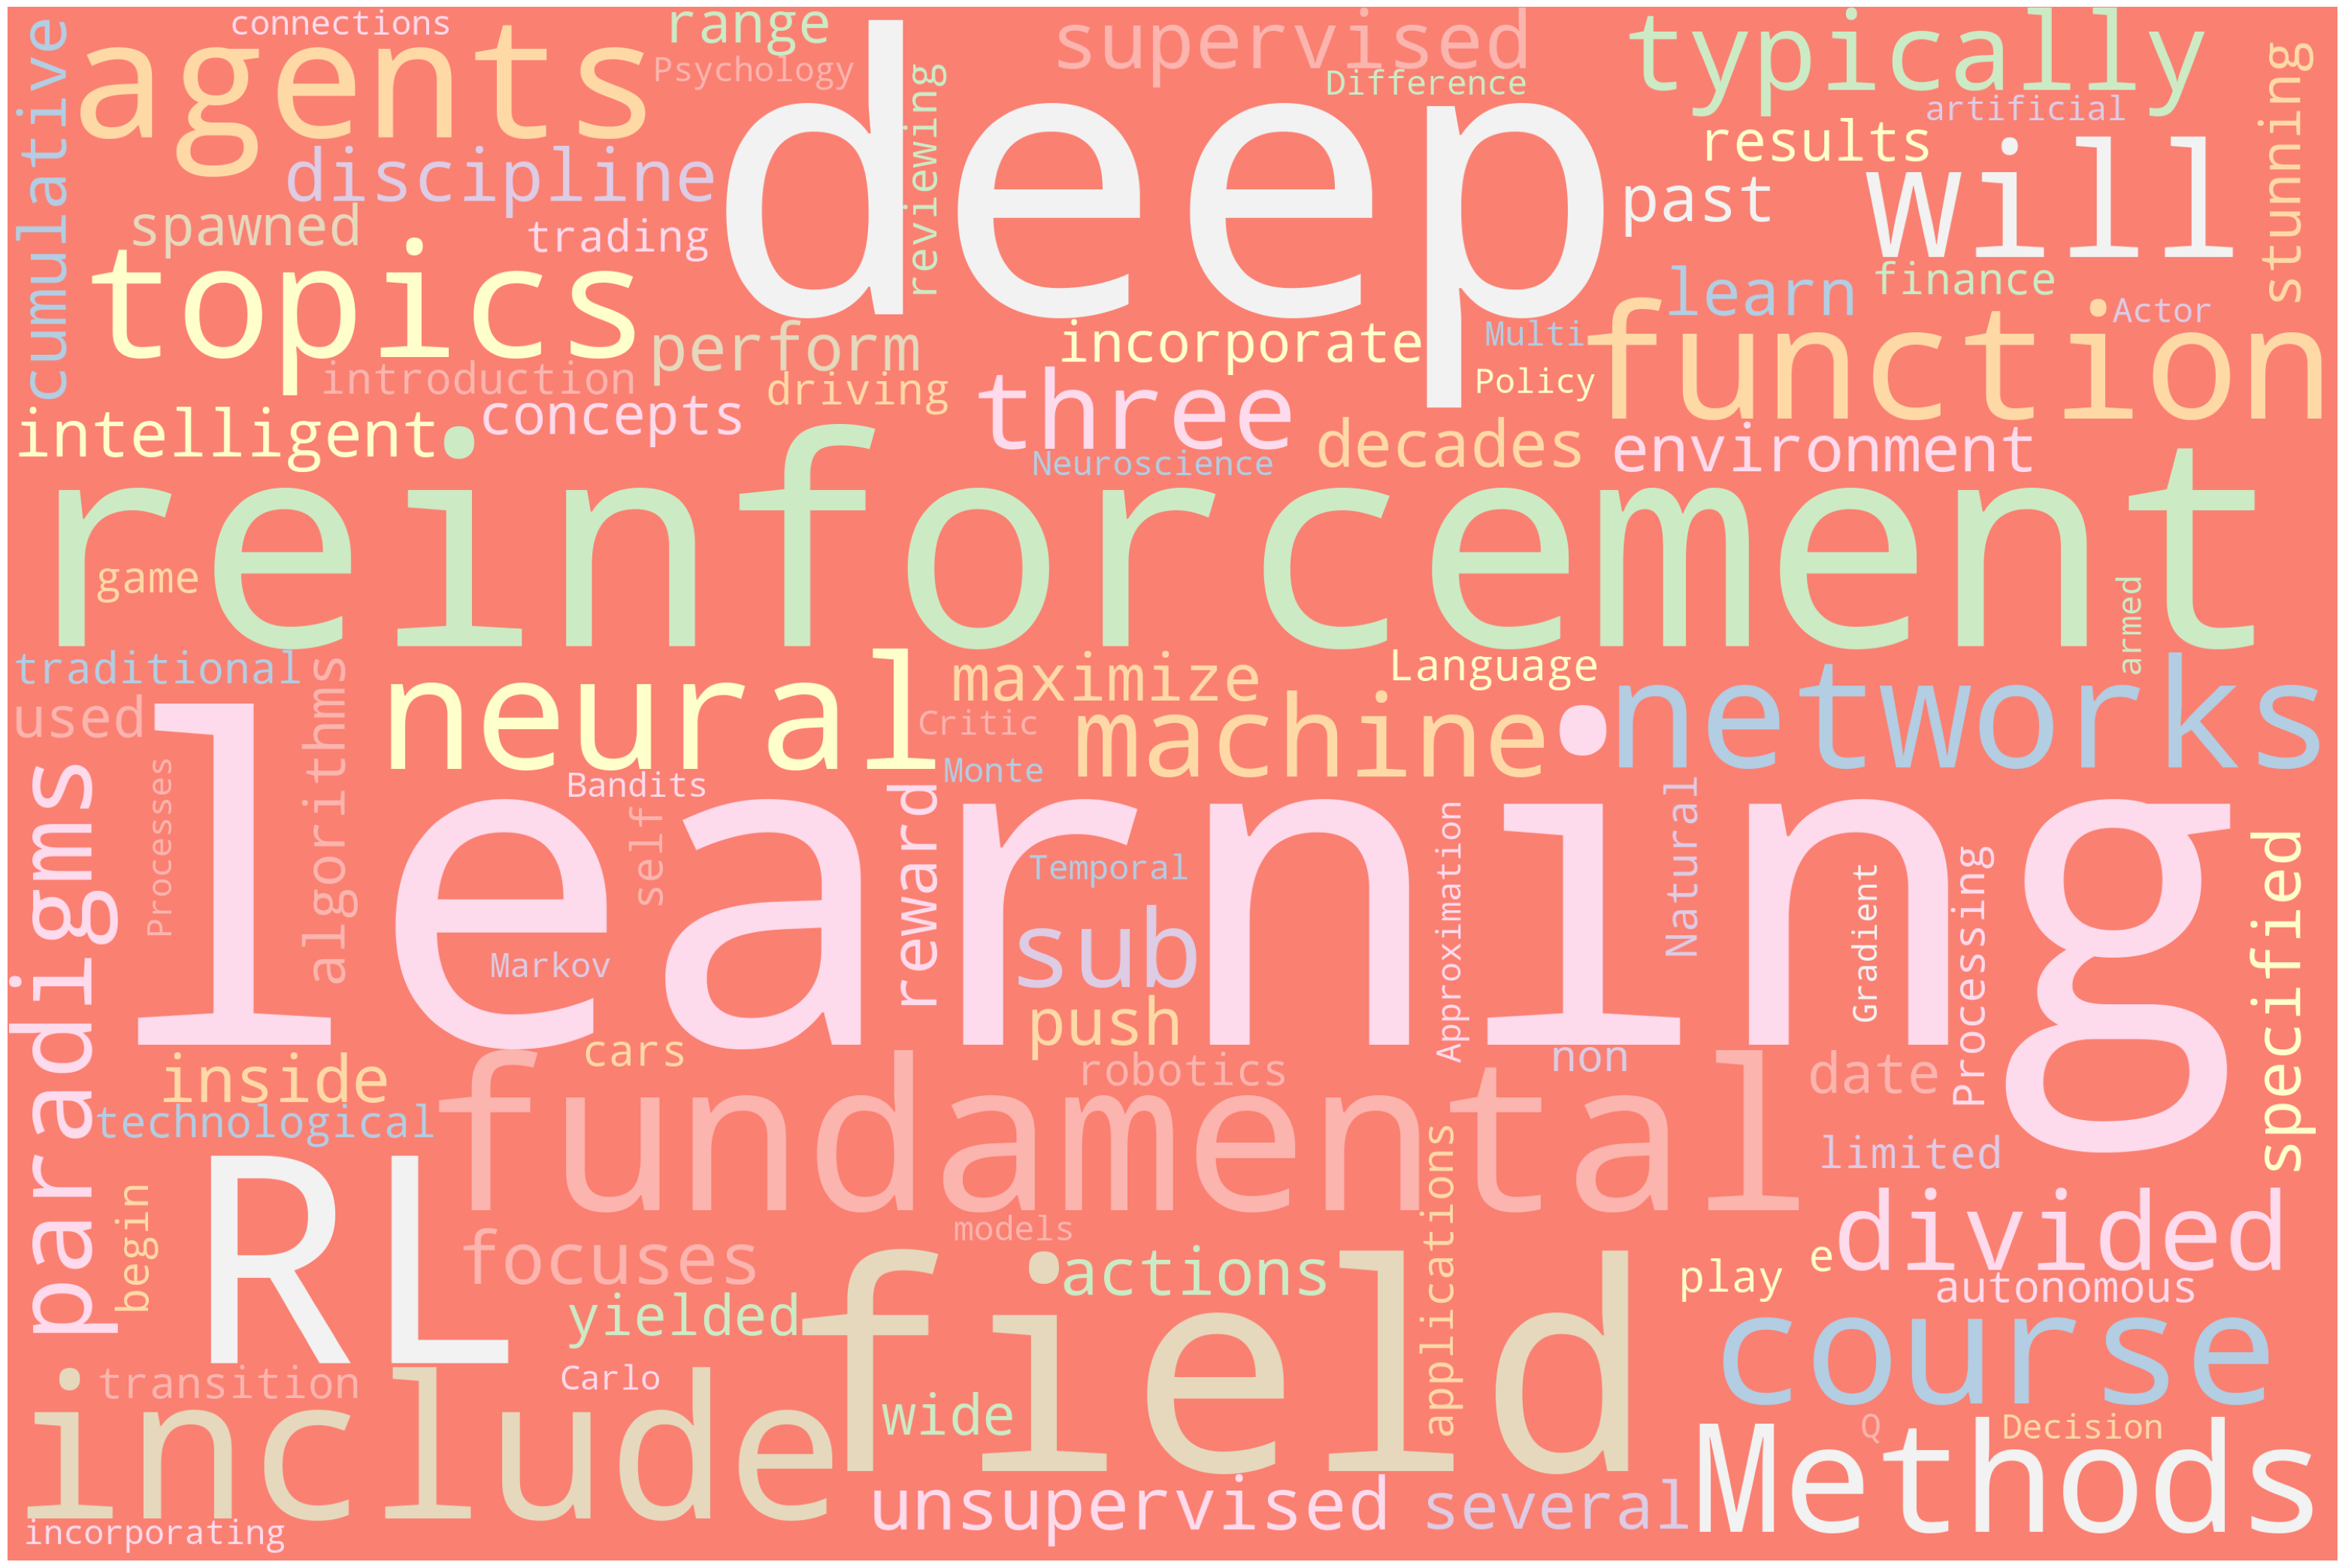

In [65]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

text='The field of machine learning is typically divided into three fundamental sub-paradigms. These include supervised learning, unsupervised learning, and reinforcement learning (RL). The discipline of reinforcement learning focuses on how intelligent agents learn to perform actions, inside a specified environment, to maximize  a cumulative reward function. Over the past several decades, there has been a push to incorporate concepts from the field of deep-learning into the agents used in RL algorithms. This has spawned the field of Deep reinforcement learning. To date, the field of deep RL has yielded stunning results in a wide range of technological applications. These include, but are not limited to, self-driving cars, autonomous game play, robotics, trading and finance, and Natural Language Processing. This course will begin with an introduction to the fundamentals of traditional, i.e. non-deep, reinforcement learning. After reviewing fundamental deep learning topics the course will transition to deep RL by incorporating artificial neural networks into the models. Topics include Markov Decision Processes, Multi-armed Bandits, Monte Carlo Methods, Temporal Difference Learning, Function Approximation, Deep Neural Networks, Actor-Critic, Deep Q-Learning, Policy Gradient Methods, and connections to Psychology and to Neuroscience.'

generate_word_cloud(text)

## Wikipedia text-mining example

The following script does the following
* Loops over a list of countries and topics
* Searches wikipedia for pages associated with those topics
* Scrapes the plaintext content from those pages
* Builds a word cloud with the text for each country 

-------------- usa --------------
topic =  travel in usa
TITLES= ['Work and Travel USA', 'Travel agency']
-------------------------
Work and Travel USA
https://en.wikipedia.org/wiki/Work_and_Travel_USA
['Requirements', 'Program overview', 'Work', 'Travel', 'Agencies', 'Legal aspects', 'Books', 'See also', 'References']
-------------------------
Travel agency
https://en.wikipedia.org/wiki/Travel_agency
['Business model', 'Travel technology', 'Types of agencies', 'Licensing', 'History', 'Outlook', 'See also', 'References', 'External links']
topic =  tourism in usa
TITLES= ['Tourism in the United States', 'Tourism']
-------------------------
Tourism in the United States
https://en.wikipedia.org/wiki/Tourism_in_the_United_States
['19th century', 'Early tourism', 'Late 20th century', '21st century', 'Attractions', 'Travel warning', 'Visitor statistics', 'See also', 'Notes', 'References', 'External links']
-------------------------
Tourism
https://en.wikipedia.org/wiki/Tourism
['Etymology', 

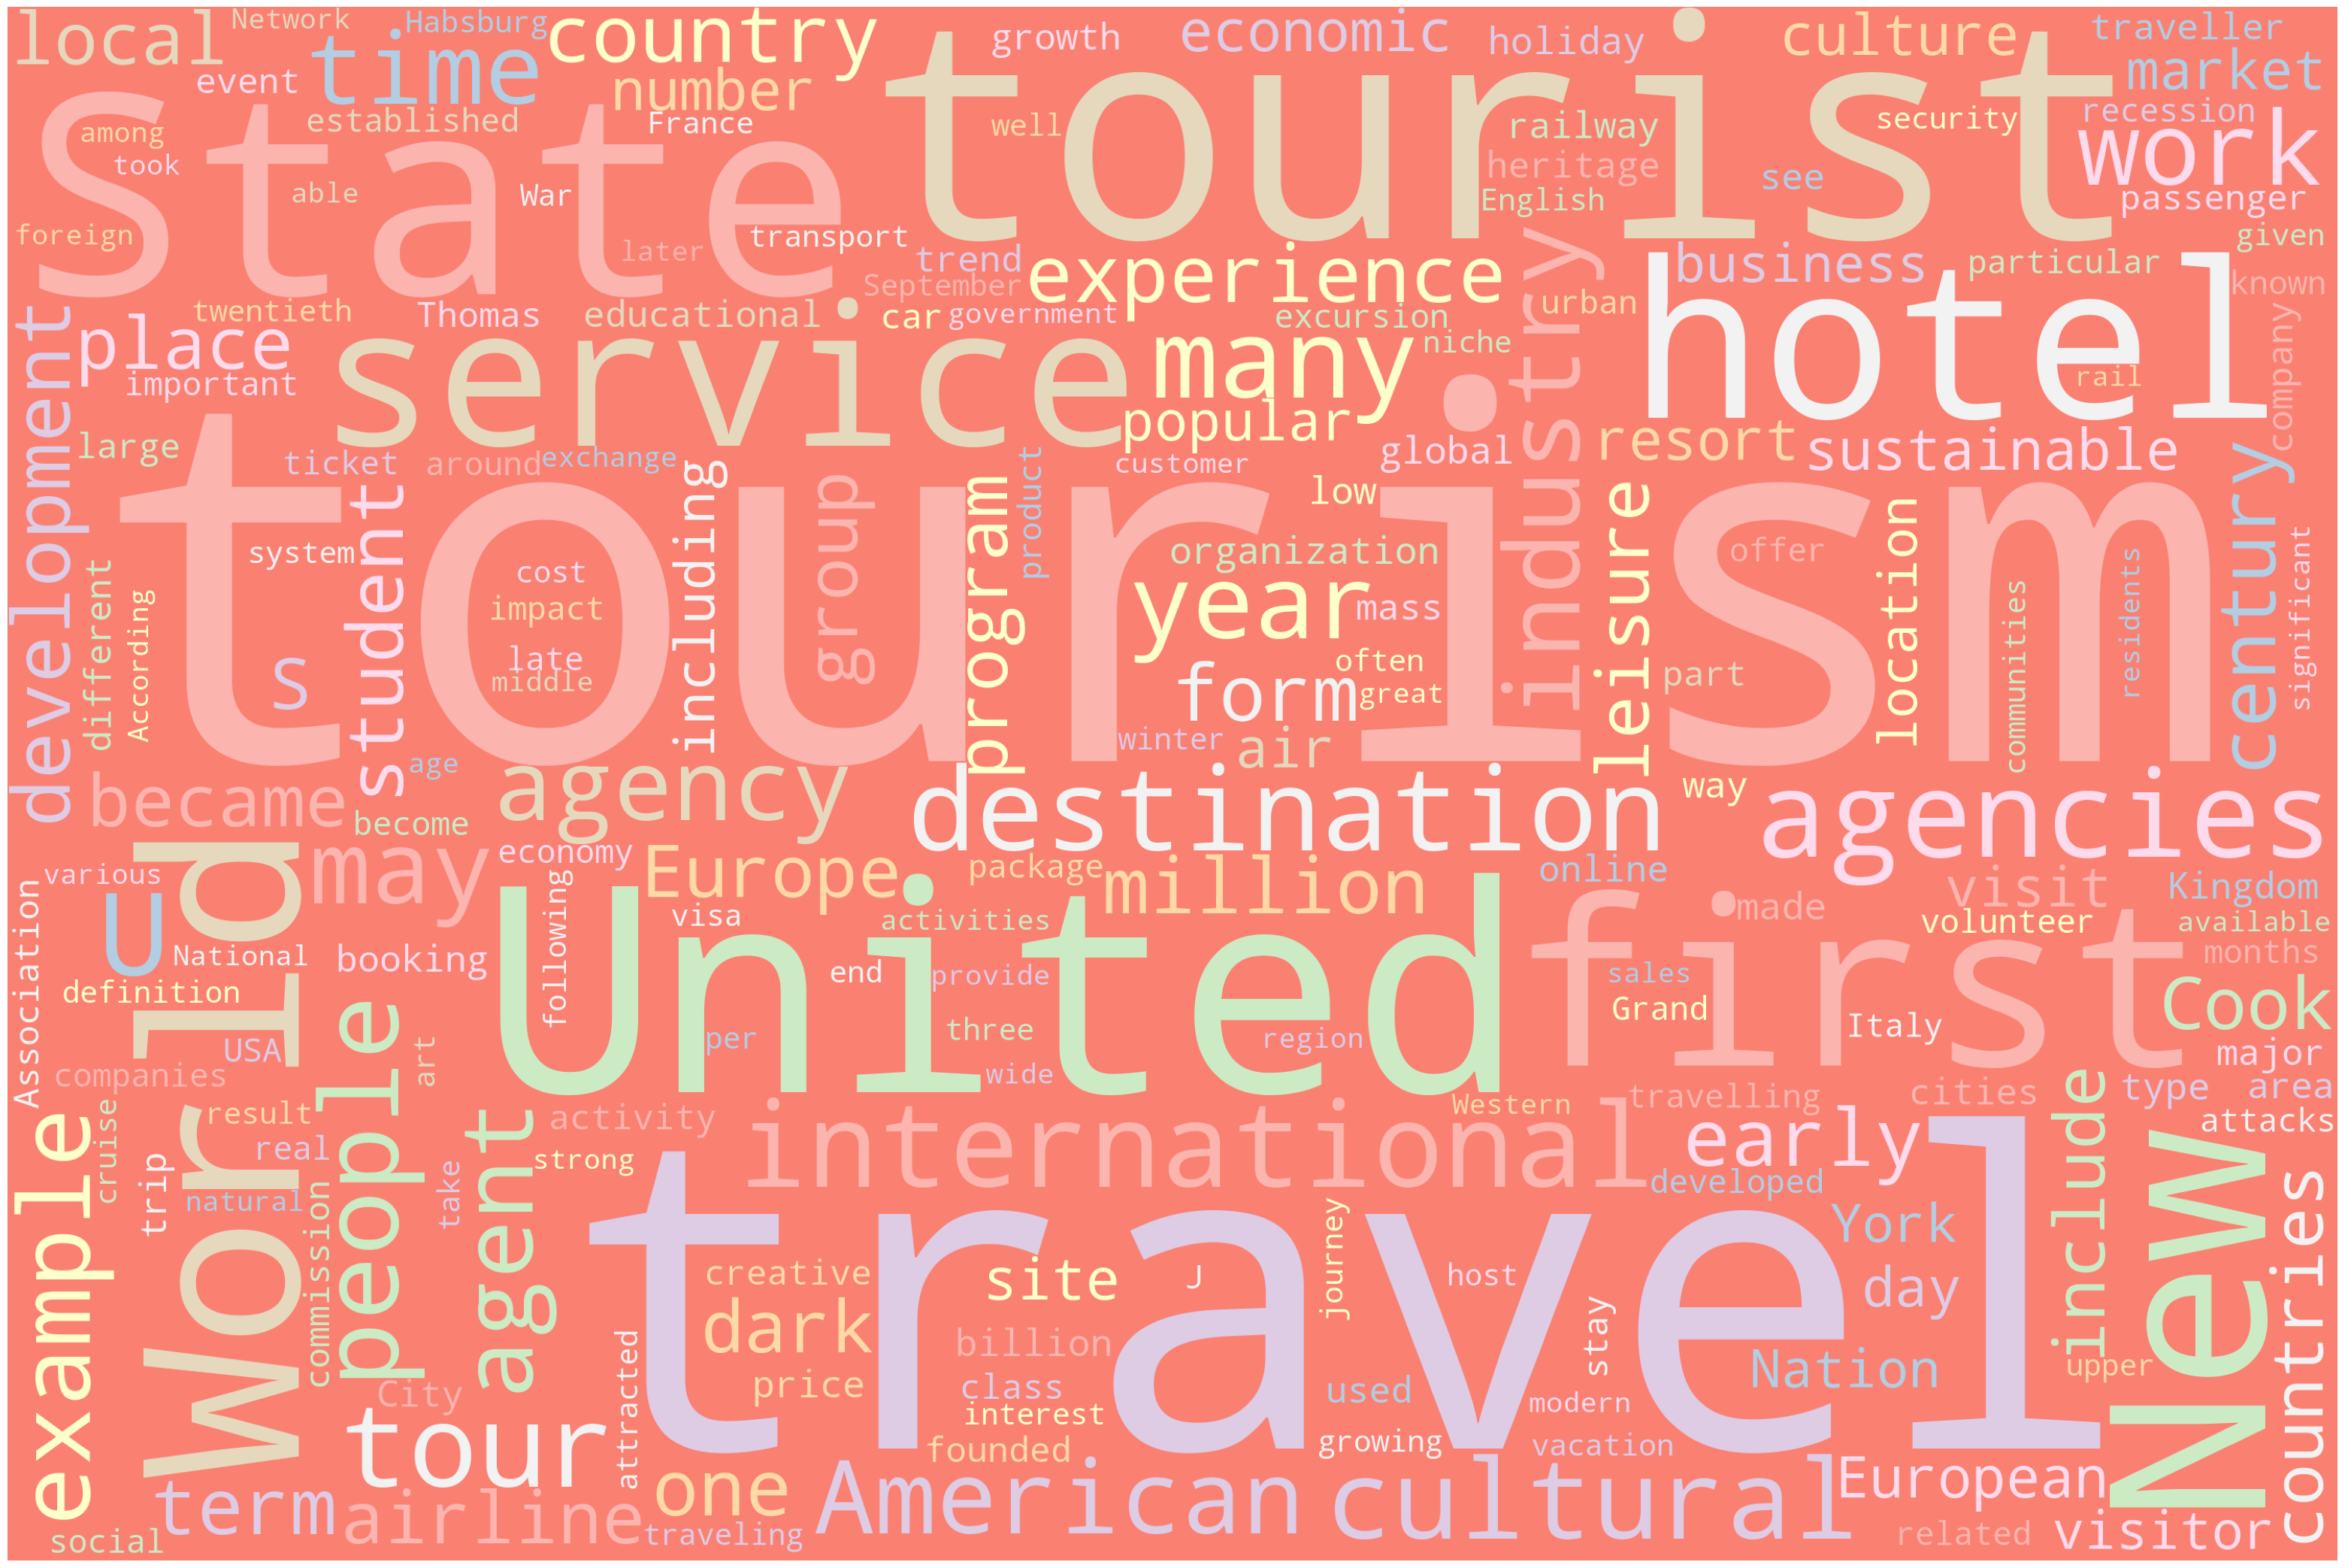

-------------- france --------------
topic =  travel in france
TITLES= ['Travel', 'Rail transport in France']
-------------------------
Travel
https://en.wikipedia.org/wiki/Travel
['Etymology', 'Purpose and motivation', 'History', 'Geographic types', 'Safety', 'See also', 'References', 'External links']
-------------------------
Rail transport in France
https://en.wikipedia.org/wiki/Rail_transport_in_France
['History', 'Exploitation', 'Freight transport', 'Passenger transport', 'Short and middle distance', 'Long distance', 'Network', 'Rail links to adjacent countries', 'Current status', 'Subsidies', 'Material', 'See also', 'References', 'External links']
topic =  tourism in france
TITLES= ['Tourism in France', 'Tourism']
-------------------------
Tourism in France
https://en.wikipedia.org/wiki/Tourism_in_France
['Statistics', 'Number of stays', 'Countries issuing tourism in France', 'Nordic countries', 'Touristic regions', 'Paris', 'French Riviera', 'Provence', 'Loire Valley', 'French 

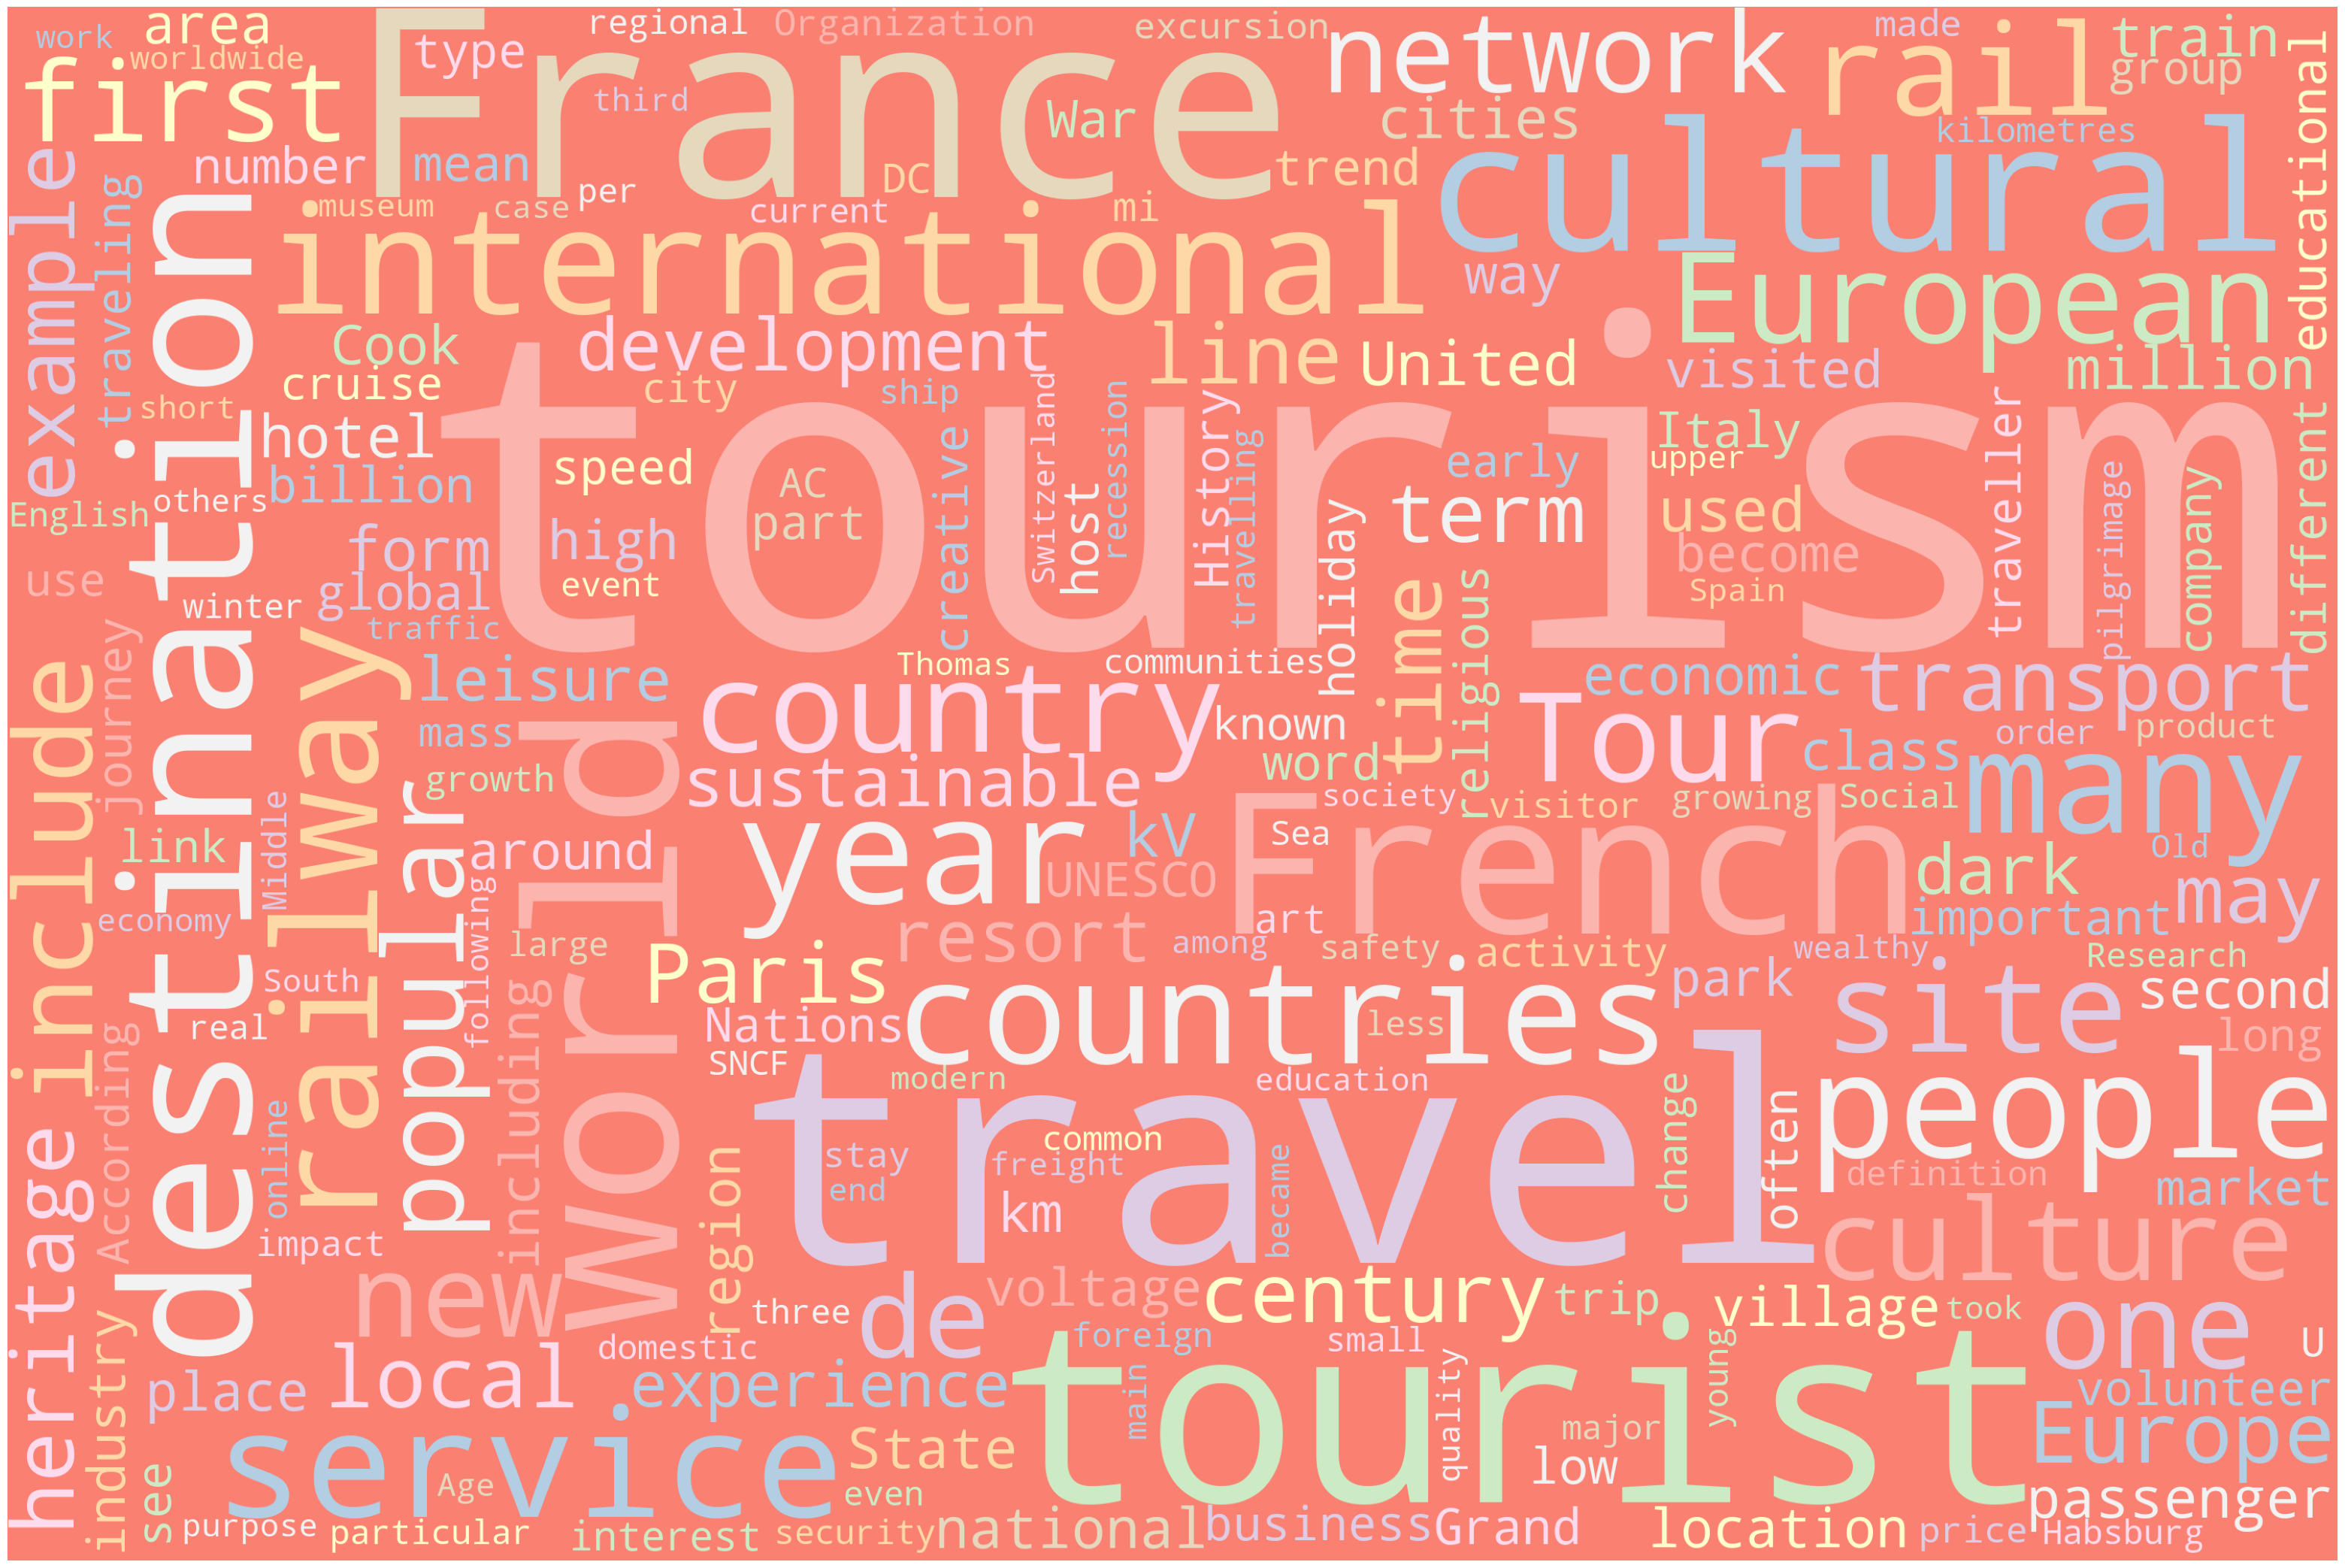

In [66]:
#--------------------------
#FUNCTION TO PRINT BASIC ABOUT WIKI PAGE
#--------------------------
def print_info(wiki_page):
	print("-------------------------")
	print(wiki_page.title)
	print(wiki_page.url)
	print(wiki_page.sections)

	if(verbose):
		print(wiki_page.sections)
		print(wiki_page.categories)
		print(wiki_page.html)
		print(wiki_page.images)
		print(wiki_page.content)
		print(wikipedia.summary(wiki_page.title, auto_suggest=False))
		print(wiki_page.references)
		print(wiki_page.links[0],len(page.links))

#--------------------------
# LOOP OVER COUNTRY AND TOPIC 
#--------------------------
country_list=['usa','france']

for country in country_list:

	print("--------------",country,"--------------")
	#initialize blank string to store page content
	text=''

	#--------------------------
	# USER INPUTS
	#--------------------------
	topic_list=['travel', 'tourism' ]
	for topic in topic_list:
		topic=topic+' in '+country
		print("topic = ",topic)
		max_num_pages=2		#max num pages returned by wiki search
		verbose=False

		#--------------------------
		#SEARCH FOR RELEVANT PAGES 
		#--------------------------
		titles=wikipedia.search(topic,results=max_num_pages)
		print("TITLES=",titles)
		
		#--------------------------
		#LOOP OVER TITLES
		#--------------------------
		num_files=0
		for title in titles:
			try:
				page = wikipedia.page(title, auto_suggest=False)
				print_info(page)
				text = text + page.content
				num_files+=1
			except:
				print("SOMETHING WENT WRONG:", title);  

	generate_word_cloud(text)

